In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from IPython.display import clear_output

# Resources

- [Karl sims](https://www.karlsims.com/rd.html)
- https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/

In [76]:
patterns = {'bacteria': {'Du':0.14, 'Dv':0.06, 'F':0.035, 'K': 0.065},
          'coral': {'Du':0.16, 'Dv':0.08, 'F':0.060, 'K': 0.062},
        'spiral': {'Du':0.12, 'Dv':0.08, 'F':0.020, 'K': 0.050},
    'zebrafish': {'Du':0.16, 'Dv':0.08, 'F':0.035, 'K': 0.060}}

class GrayScott:
    def __init__(self, N):
        self.N = N
        self.u = np.ones((N, N), dtype=np.float128)
        self.v = np.zeros((N, N), dtype=np.float128)
        
        self.initialize()
    
    def initialize(self):
        """set up initial condition"""
        N, N2, r = self.N, np.int(self.N/2), 16
        
        self.u += 0.02 * np.random.random((N,N))
        self.v += 0.02 * np.random.random((N,N))
        
        self.u[N2 - r : N2 + r, N2 - r : N2 + r] = 0.50
        self.v[N2 - r : N2 + r, N2 - r : N2 + r] = 0.25
    
    def laplacian(self):
        """Constructs a sparse matrix that applies the 5-point discretization across neighbors"""
        N = self.N
        e = np.ones(N**2)
        e2 = ([1] * (N-1) + [0]) * N
        e3 = ([0] + [1] * (N-1)) * N
        A = spdiags([-4*e, e2, e3, e, e], [0, -1, 1, -N, N], N**2, N**2)
        return A
    
    def evolve(self, Nt, Du, Dv, F, K, L, animate=False):
        """solves the PDE using the discretized Euler method"""
        N = self.N
        u = self.u.reshape((N*N))
        v = self.v.reshape((N*N))
        plt.figure(figsize=(10, 10))
        for i in range(Nt):
            uvv = u*v*v
            u += (Du*L.dot(u) - uvv + F*(1-u))
            v += (Dv*L.dot(v) + uvv - (F+K)*v)
            if animate:
                self.plot_state()
                clear_output(wait=True)
                plt.show()
        
        self.u = u
        self.v = v
        self.plot_state()
        
    def plot_state(self):
        u = self.u
        v = self.v
        N = self.N
        
        plt.imshow(u.reshape((N,N)),cmap=plt.cm.RdBu)
        plt.axis('off')     

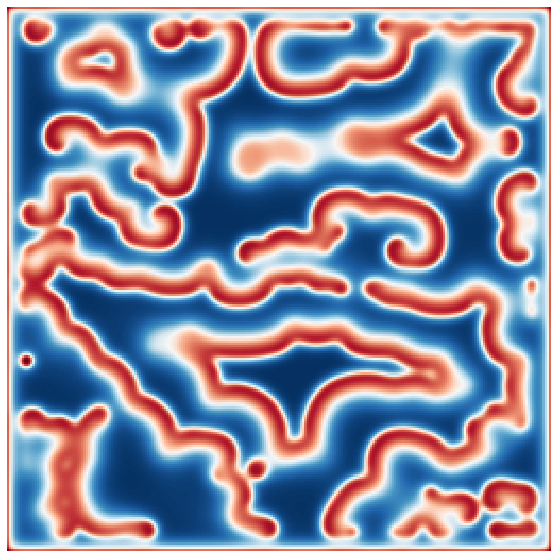

In [62]:
rd = GrayScott(256)
L = rd.laplacian()

rd.evolve(Nt=32000, **patterns['spiral'], L=L)